# Faceting


One general visualization technique that will be useful for you to know about to handle plots of two or more variables is faceting. In faceting, the data is divided into disjoint subsets, most often by different levels of a categorical variable. For each of these subsets of the data, the same plot type is rendered on other variables. Faceting is a way of comparing distributions or relationships across levels of additional variables, especially when there are three or more variables of interest overall. While faceting is most useful in multivariate visualization, it is still valuable to introduce the technique here in our discussion of bivariate plots.

For example, rather than depicting the relationship between one numeric variable and one categorical variable using a violin plot or box plot, we could use faceting to look at a histogram of the numeric variable for subsets of the data divided by categorical variable levels. Seaborn's FacetGrid class facilitates the creation of faceted plots. There are two steps involved in creating a faceted plot. First, we need to create an instance of the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) object and specify the feature we want to facet by ("VClass" in our example). Then we use the map method on the FacetGrid object to specify the plot type and variable(s) that will be plotted in each subset (in this case, histogram on "num_var").

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


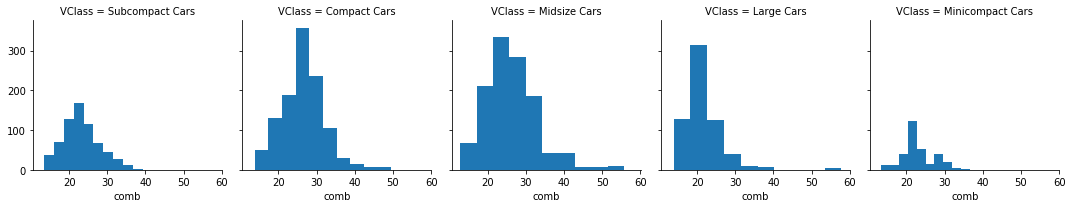

In [4]:
q=sb.FacetGrid(data=df, col='VClass')
q.map(plt.hist, 'comb')

In the map call, just set the plotting function and variable to be plotted as positional arguments. Don't set them as keyword arguments, like x = "num_var", or the mapping won't work properly.

Notice that each subset of the data is being plotted independently. Each uses the default of ten bins from hist to bin together the data, and each plot has a different bin size. Despite that, the axis limits on each facet are the same to allow clear and direct comparisons between groups. It's still worth cleaning things a little bit more by setting the same bin edges on all facets. Extra visualization parameters can be set as additional keyword arguments to the map function.

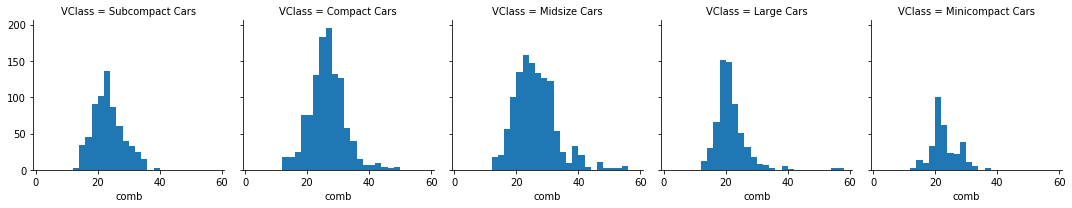

In [5]:
bins=np.arange(2,58+2,2)
q=sb.FacetGrid(data=df, col='VClass')
q.map(plt.hist, 'comb', bins=bins)

# Additional Variation


If you have many categorical levels to plot, then you might want to add more arguments to the FacetGrid object initialization to facilitate clarity in conveyance of information. The example below includes a categorical variable, "many_cat_var", that has fifteen different levels. Setting col_wrap = 5 means that the plots will be organized into rows of five facets each, rather than a single long row of fifteen plots.

In [14]:
sedan_classes=['Minicompact Cars','Subcompact Cars','Compact Cars','Midsize Cars','Large Cars']
vclasses=pd.api.types.CategoricalDtype(ordered=True,categories=sedan_classes)
df['VClass']=df['VClass'].astype(vclasses);

In [15]:
group_means=df.groupby(['VClass']).mean()
group_order = group_means.sort_values(['comb'], ascending = False).index

In [16]:
group_order

CategoricalIndex(['Compact Cars', 'Midsize Cars', 'Subcompact Cars',
                  'Minicompact Cars', 'Large Cars'],
                 categories=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars'], ordered=True, name='VClass', dtype='category')

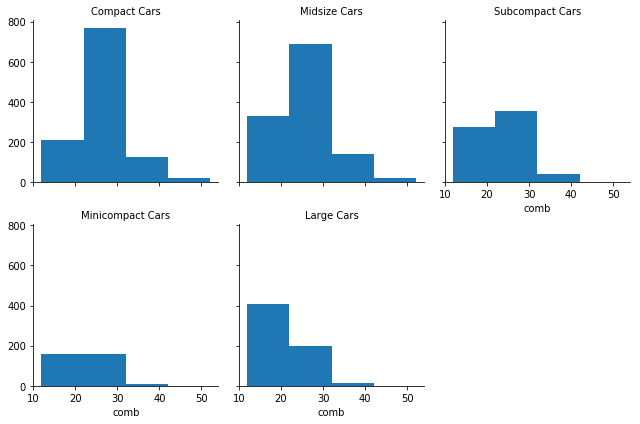

In [21]:
g = sb.FacetGrid(data = df, col = 'VClass', col_wrap = 3, size = 3,
                 col_order = group_order)
g.map(plt.hist, 'comb', bins = np.arange(12, 57+1, 10))
g.set_titles('{col_name}')

In [17]:
df['comb'].describe()

count    3929.000000
mean       24.791339
std         6.003246
min        12.821700
25%        20.658100
50%        24.000000
75%        28.227100
max        57.782400
Name: comb, dtype: float64

Other operations may be performed to increase the immediate readability of the plots: setting each facet height to 3 inches ("size"), sorting the facets by group mean ("col_order"), limiting the number of bin edges, and changing the titles of each facet to just the categorical level name using the set_titles method and {col_name} template variable.